In [1]:
#BeautifulSoup is library for web scraping
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav")

<Response [403]>

In [3]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav").text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;146d3f17&#46;1704095595&#46;3851b826\n</BODY>\n</HTML>\n'

From above we can know that access is denied, in cases like this we can't directly  access data from site, we need to use method as below which makes it feaible to get data

# if response code is 403
 - headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
 -requests.get('url',headers=headers).text

<!doctype html>
<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">
  <head >
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">
    <meta http-equiv="X-UA-Compatible" content="IE=edge"> 
    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>

    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleus
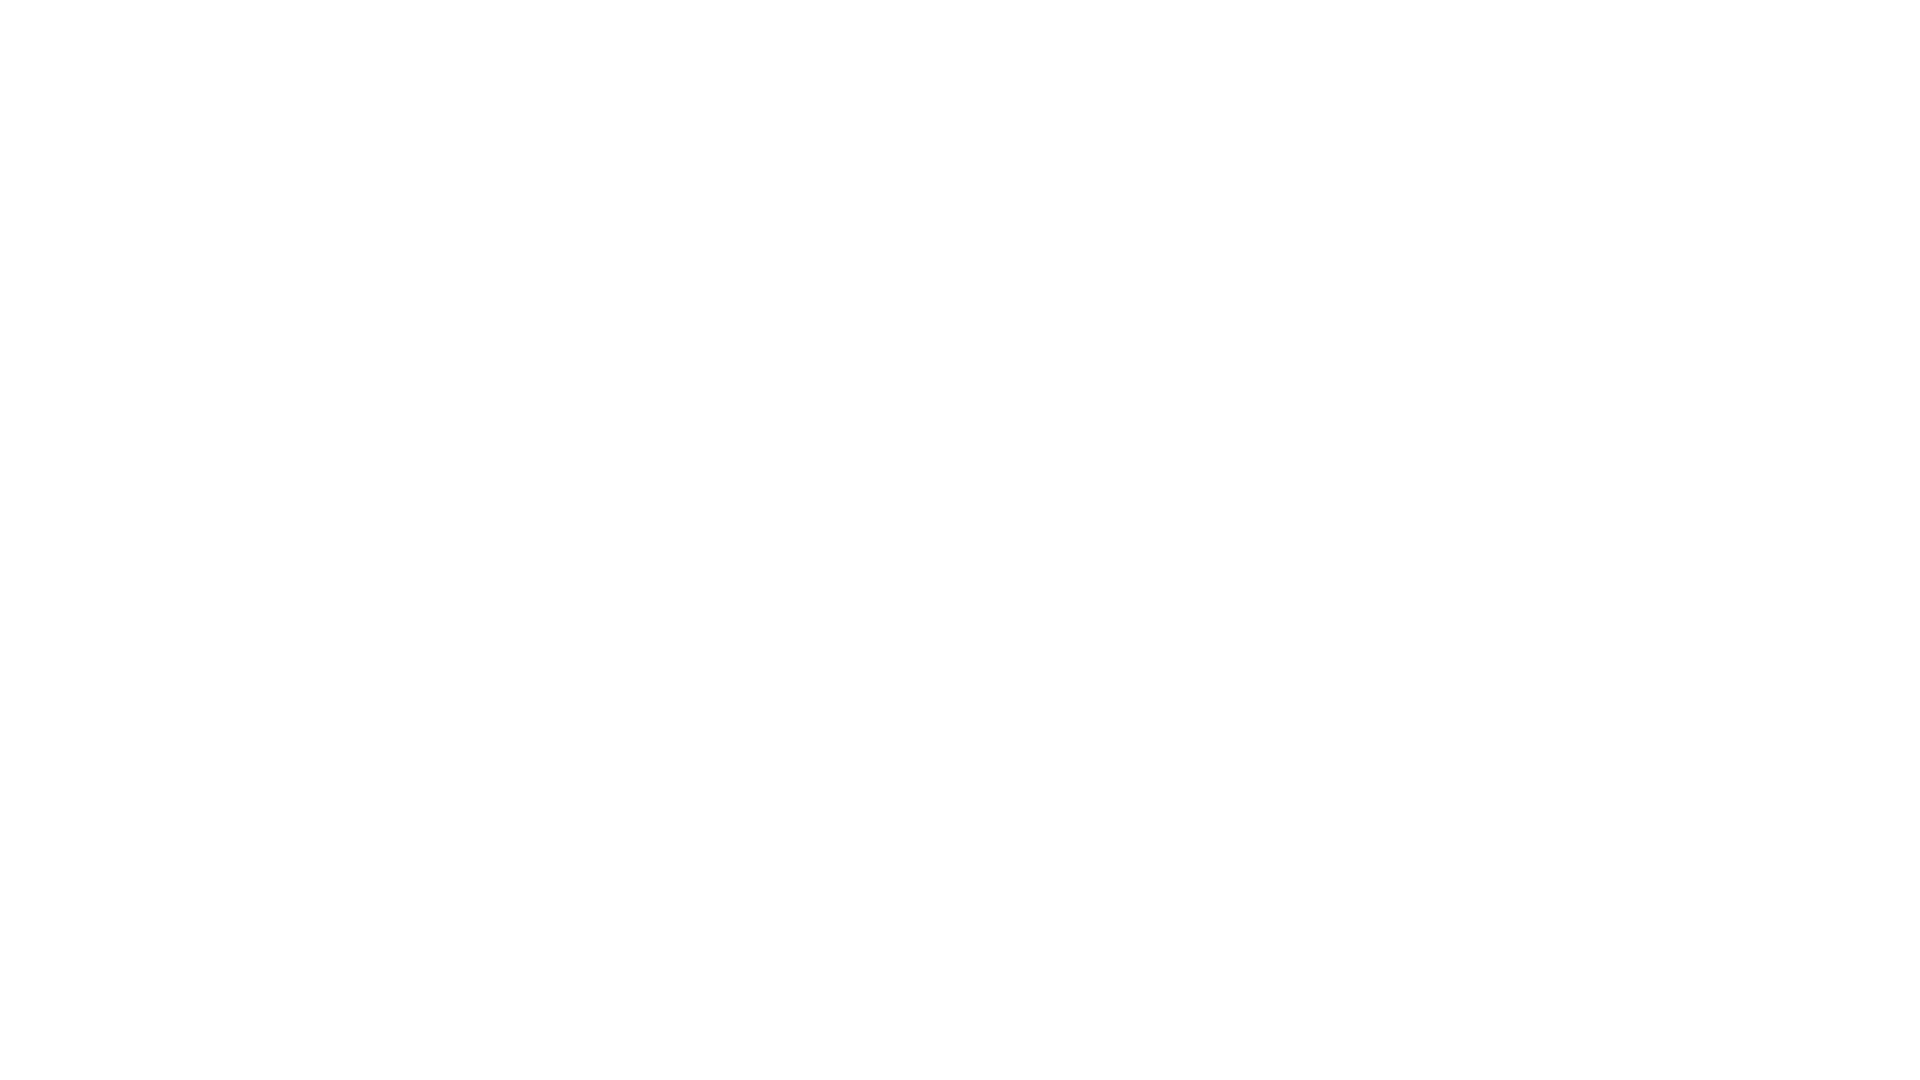
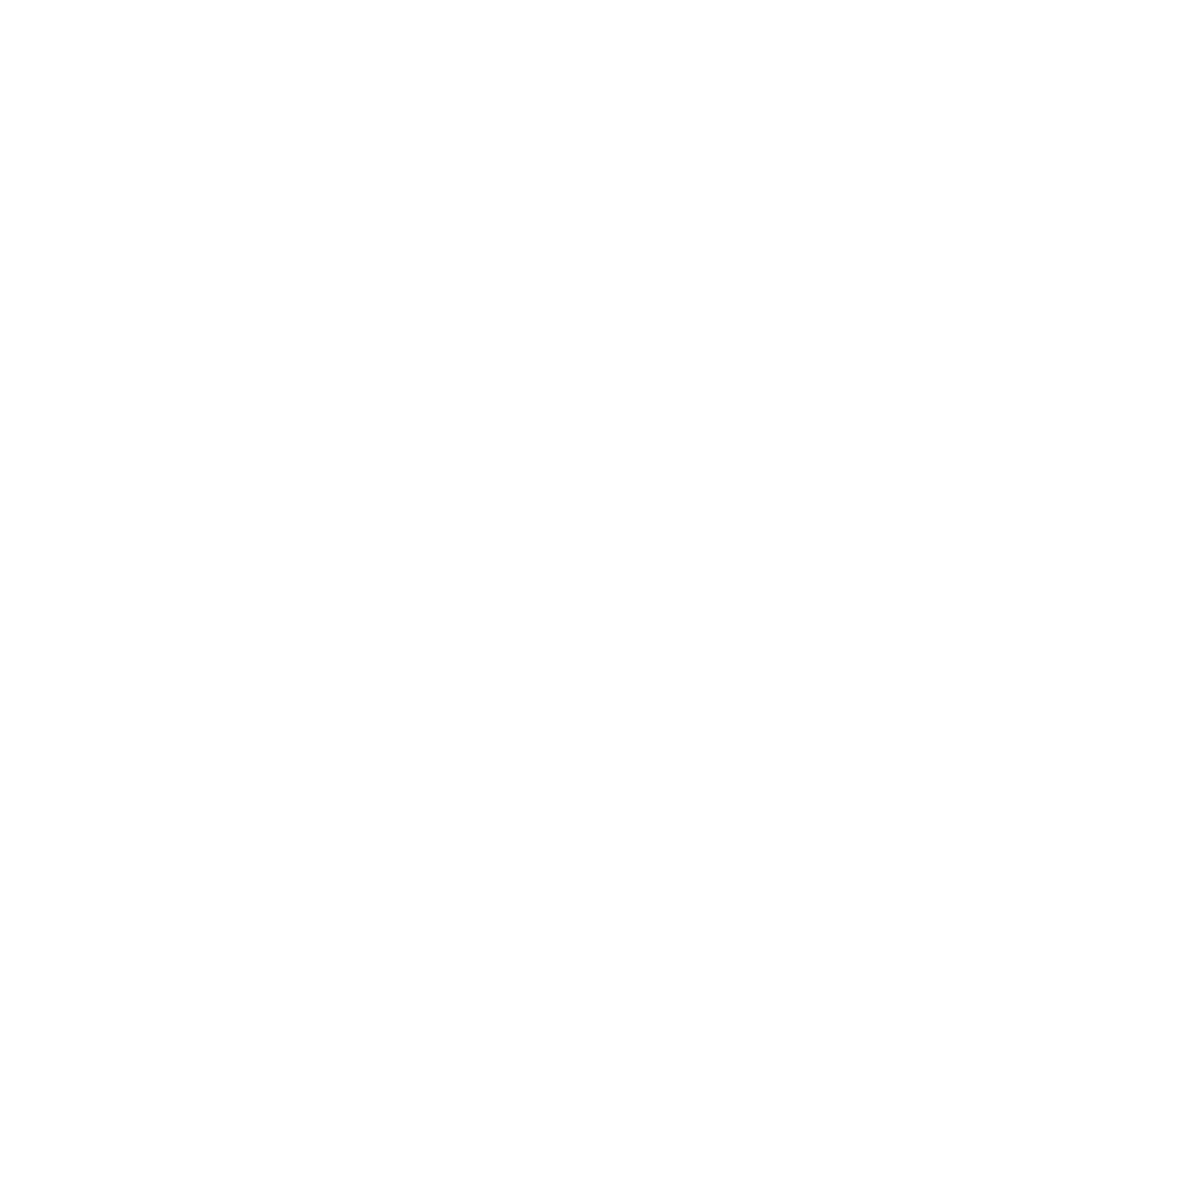

In [4]:
import requests

url = 'https://www.ambitionbox.com/list-of-companies?page=1'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'  # use this temporarily till understand clearly, can replace with a different user agent
}

response = requests.get(url, headers=headers)
print(response.text)  # Check the response for any changes


In [5]:
if response.status_code == 200:  # Ensure the request was successful
    soup = BeautifulSoup(response.content, 'lxml')
    # Now you can work with the 'soup' object for parsing and extracting data
    # ...
else:
    print(f"Failed to fetch the content. Status code: {response.status_code}")

In [6]:
soup = BeautifulSoup(response.content, 'lxml')

In [7]:
#print(soup.prettify())

# TO FIND OUT NAMES OF THE COMPANIES

##### right click on website page, click inspect, click on first icon which says "select an element in page to inpsect it", then click on element for example company name to inspect code, check html elements like h2,p,span and then check class name . it would would like "<p class="special">This is a special paragraph.</p>" here p is element and class name is "special

### Note :all this can be dynamic, so, check whenever need to work or have problem

In [8]:
for i in soup.find_all('h2'):
  print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
HDFC Bank
ICICI Bank
Infosys
Capgemini
HCLTech
Tech Mahindra
Genpact
Axis Bank
Concentrix Corporation
Amazon
Teleperformance
Reliance Jio
IBM
Larsen & Toubro Limited
Reliance Retail
HDB Financial Services
Companies by  Industry
Companies by  Locations
Companies by  Type
Companies by  Badges


In [9]:
for i in soup.find_all('span'):
  print(i.text.strip())

+
You can choose to be
						anonymous
anonymous

Companies
Reviews
Salaries
Interviews
All Filters








9,46,652
							unique
							companies found
Follow
3.8
IT Services & Consulting | 1 Lakh+ Employees | Public | 56 years old | Mumbai +330 more
Highly Rated For
Job Security, Work Life Balance
Critically Rated For
Promotions / Appraisal, Salary & Benefits
71k
Reviews
852.8k
Salaries
5.9k
Interviews
498
Jobs
11.4k
Benefits
77
Photos
Follow
4.0
IT Services & Consulting | 1 Lakh+ Employees | Public | 35 years old | Dublin +165 more
Highly Rated For
Company Culture, Skill Development / Learning, Job Security
45k
Reviews
582.3k
Salaries
4.1k
Interviews
5.5k
Jobs
7k
Benefits
39
Photos

Follow
3.9
IT Services & Consulting | 1 Lakh+ Employees | Forbes Global 2000 | 30 years old | Teaneck. New Jersey. +150 more
Highly Rated For
Skill Development / Learning
Critically Rated For
Promotions / Appraisal
40.5k
Reviews
559k
Salaries
3.5k
Interviews
487
Jobs
5.8k
Benefits
62
Photos
Follow
3.8
I

## TO FIND OUT THE RATINGS

##### in above it has all info like rating, reviews, etc need only rating, so check classname like above and use

In [10]:
ratings = soup.find_all('span', class_='companyCardWrapper__companyRatingValue')
ratings

[<span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">4.0</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">4.0</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.6</span>,
 <span class="companyCardWrapper__companyRatingValue">3.7</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">4.1</span>,
 <span class="companyCardWrapper__companyRatingValue">3.6</span>,
 <span cla

In [11]:
# Example of finding ratings using BeautifulSoup
ratings = soup.find_all('span', class_='companyCardWrapper__companyRatingValue')

# Check if ratings were found
if ratings:
    for rating in ratings:
        print(rating.text.strip())
else:
    print("No ratings found")


3.8
4.0
3.9
3.8
3.9
4.0
3.8
3.8
3.6
3.7
3.9
3.8
3.9
4.1
3.6
4.0
4.1
4.0
3.9
4.0


In [12]:
len(ratings)

20

## TO FIND OUT THE NO.OF REVIEWS

In [13]:
soup.find_all('span', class_='companyCardWrapper__ActionCount')

[<span class="companyCardWrapper__ActionCount">71k</span>,
 <span class="companyCardWrapper__ActionCount">852.8k</span>,
 <span class="companyCardWrapper__ActionCount">5.9k</span>,
 <span class="companyCardWrapper__ActionCount">498</span>,
 <span class="companyCardWrapper__ActionCount">11.4k</span>,
 <span class="companyCardWrapper__ActionCount">77</span>,
 <span class="companyCardWrapper__ActionCount">45k</span>,
 <span class="companyCardWrapper__ActionCount">582.3k</span>,
 <span class="companyCardWrapper__ActionCount">4.1k</span>,
 <span class="companyCardWrapper__ActionCount">5.5k</span>,
 <span class="companyCardWrapper__ActionCount">7k</span>,
 <span class="companyCardWrapper__ActionCount">39</span>,
 <span class="companyCardWrapper__ActionCount">40.5k</span>,
 <span class="companyCardWrapper__ActionCount">559k</span>,
 <span class="companyCardWrapper__ActionCount">3.5k</span>,
 <span class="companyCardWrapper__ActionCount">487</span>,
 <span class="companyCardWrapper__ActionCoun

## TO FIND OUT THE NUMBER OF REVIEWS

In [14]:
len(soup.find_all('span', class_='companyCardWrapper__ActionCount'))

120

In [15]:
soup.find_all('span', class_='companyCardWrapper__ActionTitle')

[<span class="companyCardWrapper__ActionTitle">Reviews</span>,
 <span class="companyCardWrapper__ActionTitle">Salaries</span>,
 <span class="companyCardWrapper__ActionTitle">Interviews</span>,
 <span class="companyCardWrapper__ActionTitle">Jobs</span>,
 <span class="companyCardWrapper__ActionTitle">Benefits</span>,
 <span class="companyCardWrapper__ActionTitle">Photos</span>,
 <span class="companyCardWrapper__ActionTitle">Reviews</span>,
 <span class="companyCardWrapper__ActionTitle">Salaries</span>,
 <span class="companyCardWrapper__ActionTitle">Interviews</span>,
 <span class="companyCardWrapper__ActionTitle">Jobs</span>,
 <span class="companyCardWrapper__ActionTitle">Benefits</span>,
 <span class="companyCardWrapper__ActionTitle">Photos</span>,
 <span class="companyCardWrapper__ActionTitle">Reviews</span>,
 <span class="companyCardWrapper__ActionTitle">Salaries</span>,
 <span class="companyCardWrapper__ActionTitle">Interviews</span>,
 <span class="companyCardWrapper__ActionTitle">Jo

In [16]:
len(soup.find_all('span', class_='companyCardWrapper__ActionTitle'))

120

In [17]:
soup.find_all('span', class_='companyCardWrapper__ActionTitle')[0]

<span class="companyCardWrapper__ActionTitle">Reviews</span>

In [18]:
len(soup.find_all('span', class_='companyCardWrapper__ActionTitle'))

120

here 120 is coming since jobs, salries, reviews etc are all coming. so, what to do now??? consider the whole container. did that after explored for a bit more.

In [19]:
soup.find_all('div', class_='companyCardWrapper__ratingWrapper')

[<div class="companyCardWrapper__ratingWrapper"><div class="companyCardWrapper__interLinkingWrapper"><span class="companyCardWrapper__interLinking">
 									IT Services &amp; Consulting | 1 Lakh+ Employees | Public | 56 years old | Mumbai +330 more
 								</span></div> <!-- --> <div class="companyCardWrapper__ratingComparisonWrapper"><div><div class="companyCardWrapper__ratingHeader"><img height="14px" src="/static/companyListing/ThumbsUp.svg" width="14px"/> <span class="companyCardWrapper__ratingHeader--high">Highly Rated For</span></div> <span class="companyCardWrapper__ratingValues">Job Security, Work Life Balance</span></div> <div><div class="companyCardWrapper__ratingHeader"><img height="14px" src="/static/companyListing/ThumbsDown.svg" width="14px"/> <span class="companyCardWrapper__ratingHeader--critical">Critically Rated For</span></div> <span class="companyCardWrapper__ratingValues">Promotions / Appraisal, Salary &amp; Benefits</span></div></div></div>,
 <div class="compan

In [20]:
len(soup.find_all('div', class_='companyCardWrapper__ratingWrapper'))

20

In [21]:
soup.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip()

'IT Services & Consulting | 1 Lakh+ Employees | Public | 56 years old | Mumbai +330 more\n\t\t\t\t\t\t\t\t   Highly Rated For Job Security, Work Life Balance  Critically Rated For Promotions / Appraisal, Salary & Benefits'

In [22]:
x= soup.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip()
x.split("|")

['IT Services & Consulting ',
 ' 1 Lakh+ Employees ',
 ' Public ',
 ' 56 years old ',
 ' Mumbai +330 more\n\t\t\t\t\t\t\t\t   Highly Rated For Job Security, Work Life Balance  Critically Rated For Promotions / Appraisal, Salary & Benefits']

In [23]:
x= soup.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip()
x=x.split("|")
print("Industry sector : ", x[0])
print("No.of employeess :", x[1])
print("Company type :", x[2])
print("Company age : ", x[3])
print("Head quarters : ", x[4])


Industry sector :  IT Services & Consulting 
No.of employeess :  1 Lakh+ Employees 
Company type :  Public 
Company age :   56 years old 
Head quarters :   Mumbai +330 more
								   Highly Rated For Job Security, Work Life Balance  Critically Rated For Promotions / Appraisal, Salary & Benefits


In [24]:
type(x[4])

str

In [25]:
x[4]

' Mumbai +330 more\n\t\t\t\t\t\t\t\t   Highly Rated For Job Security, Work Life Balance  Critically Rated For Promotions / Appraisal, Salary & Benefits'

In [26]:
x[4].split()[0]

'Mumbai'

In [27]:
x= soup.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip()
x=x.split("|")
print("Industry sector : ", x[0])
print("No.of employeess :", x[1])
print("Company type :", x[2])
print("Company age : ", x[3])

print("Head quarters : ", x[4].split("\n")[0])

Industry sector :  IT Services & Consulting 
No.of employeess :  1 Lakh+ Employees 
Company type :  Public 
Company age :   56 years old 
Head quarters :   Mumbai +330 more


# CONSIDERING THE WHOLE CONTAINER



In [28]:
company=soup.find_all('div',class_='companyCardWrapper')

In [29]:
len(company) 

20

In [30]:
name=[]
rating=[]


for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  #here used find instead of findall, since we are taking one container at once 
  #it will have only one rating
df=pd.DataFrame({'name':name,
   'rating':rating,
   })
  


In [31]:
print(name)
print(rating)

['TCS', 'Accenture', 'Cognizant', 'Wipro', 'HDFC Bank', 'ICICI Bank', 'Infosys', 'Capgemini', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Axis Bank', 'Concentrix Corporation', 'Amazon', 'Teleperformance', 'Reliance Jio', 'IBM', 'Larsen & Toubro Limited', 'Reliance Retail', 'HDB Financial Services']
['3.8', '4.0', '3.9', '3.8', '3.9', '4.0', '3.8', '3.8', '3.6', '3.7', '3.9', '3.8', '3.9', '4.1', '3.6', '4.0', '4.1', '4.0', '3.9', '4.0']


In [32]:
name=[]
rating=[]
reviews=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  #here used find instead of findall, since we are taking one container at once 
  #it will have only one rating
    
  #inbelow using find_all since all reviews, salries etc are in one , find all, use one.
  reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())
df=pd.DataFrame({'name':name,
   'rating':rating,
   })
  
print(name)
print(rating)
print(reviews)

['TCS', 'Accenture', 'Cognizant', 'Wipro', 'HDFC Bank', 'ICICI Bank', 'Infosys', 'Capgemini', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Axis Bank', 'Concentrix Corporation', 'Amazon', 'Teleperformance', 'Reliance Jio', 'IBM', 'Larsen & Toubro Limited', 'Reliance Retail', 'HDB Financial Services']
['3.8', '4.0', '3.9', '3.8', '3.9', '4.0', '3.8', '3.8', '3.6', '3.7', '3.9', '3.8', '3.9', '4.1', '3.6', '4.0', '4.1', '4.0', '3.9', '4.0']
['71k', '45k', '40.5k', '38.1k', '32.7k', '32.5k', '30.8k', '28.6k', '27.5k', '26.7k', '25.4k', '21.3k', '21.1k', '20.2k', '20.1k', '20k', '19.2k', '18.2k', '18k', '17.4k']


In [33]:
name=[]
rating=[]
reviews=[]
industry_sector=[]
no_of_employees=[]
company_type=[]
how_old=[]
head_quarters=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  #here used find instead of findall, since we are taking one container at once 
  #it will have only one rating
    
  #inbelow using find_all since all reviews, salries etc are in one , find all, use one.

  reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())

  x= i.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip().split("|")
  industry_sector.append(x[0])
  no_of_employees.append(x[1])
  company_type.append(x[2])
  how_old.append(x[3])
  #head_quarters.append(x[4].split("\n")[0])

    
    
df=pd.DataFrame({'name':name,
   'rating':rating,
   })
print(len(name), len(rating), len(reviews),len(industry_sector), len(no_of_employees), len(company_type), len(how_old))

20 20 20 20 20 20 20


In [34]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'Wipro',
 'HDFC Bank',
 'ICICI Bank',
 'Infosys',
 'Capgemini',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Axis Bank',
 'Concentrix Corporation',
 'Amazon',
 'Teleperformance',
 'Reliance Jio',
 'IBM',
 'Larsen & Toubro Limited',
 'Reliance Retail',
 'HDB Financial Services']

In [35]:
rating

['3.8',
 '4.0',
 '3.9',
 '3.8',
 '3.9',
 '4.0',
 '3.8',
 '3.8',
 '3.6',
 '3.7',
 '3.9',
 '3.8',
 '3.9',
 '4.1',
 '3.6',
 '4.0',
 '4.1',
 '4.0',
 '3.9',
 '4.0']

In [36]:
reviews


['71k',
 '45k',
 '40.5k',
 '38.1k',
 '32.7k',
 '32.5k',
 '30.8k',
 '28.6k',
 '27.5k',
 '26.7k',
 '25.4k',
 '21.3k',
 '21.1k',
 '20.2k',
 '20.1k',
 '20k',
 '19.2k',
 '18.2k',
 '18k',
 '17.4k']

In [37]:
industry_sector

['IT Services & Consulting ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'Banking ',
 'Banking ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'IT Services & Consulting ',
 'Banking ',
 'BPO ',
 'Internet ',
 'BPO ',
 'Telecom ',
 'Software Product ',
 'Engineering & Construction ',
 'Retail ',
 'NBFC ']

In [38]:
company_type

[' Public ',
 ' Public ',
 ' Forbes Global 2000 ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Forbes Global 2000 ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' 18 years old ',
 ' 17 years old ']

In [39]:
how_old

[' 56 years old ',
 ' 35 years old ',
 ' 30 years old ',
 ' 79 years old ',
 ' 30 years old ',
 ' 30 years old ',
 ' 43 years old ',
 ' 57 years old ',
 ' 33 years old ',
 ' 38 years old ',
 ' 27 years old ',
 ' 31 years old ',
 ' 41 years old ',
 ' 30 years old ',
 ' 46 years old ',
 ' 17 years old ',
 ' 113 years old ',
 ' 86 years old ',
 " Navi Mumbai +965 more\n\t\t\t\t\t\t\t\t   \n\t\t AmbitionBox Award Winner'22\n\t    Highly Rated For Skill Development / Learning, Job Security  Critically Rated For Promotions / Appraisal",
 " Ahmedabad +928 more\n\t\t\t\t\t\t\t\t   \n\t\t AmbitionBox Award Winner'22\n\t    Highly Rated For Skill Development / Learning, Job Security, Company Culture  Critically Rated For Promotions / Appraisal"]

In [40]:
no_of_employees

[' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 50k-1 Lakh Employees ',
 ' 50k-1 Lakh Employees ',
 ' 1 Lakh+ Employees ',
 ' 50k-1 Lakh Employees ',
 ' 50k-1 Lakh Employees ',
 ' 1 Lakh+ Employees ',
 ' 10k-50k Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ']

In [41]:
df = pd.DataFrame({
    'name': name,
    'rating': rating,
    'reviews': reviews,
    'industry_sector': industry_sector,
    'no_of_employees': no_of_employees,
    'company_type': company_type,
    'how_old': how_old,
    #'head_quarters': head_quarters
})

In [42]:
df

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old
0,TCS,3.8,71k,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old
1,Accenture,4.0,45k,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old
2,Cognizant,3.9,40.5k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old
3,Wipro,3.8,38.1k,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old
4,HDFC Bank,3.9,32.7k,Banking,1 Lakh+ Employees,Public,30 years old
5,ICICI Bank,4.0,32.5k,Banking,1 Lakh+ Employees,Public,30 years old
6,Infosys,3.8,30.8k,IT Services & Consulting,1 Lakh+ Employees,Public,43 years old
7,Capgemini,3.8,28.6k,IT Services & Consulting,1 Lakh+ Employees,Public,57 years old
8,HCLTech,3.6,27.5k,IT Services & Consulting,1 Lakh+ Employees,Public,33 years old
9,Tech Mahindra,3.7,26.7k,IT Services & Consulting,1 Lakh+ Employees,Public,38 years old


In [43]:
df.shape

(20, 7)

In [44]:

# Find the pagination element
pagination = soup.find('div', class_='pagination-btns')  # Update class or tag as per the website's structure

# Extract the number of pages from pagination controls
if pagination:
    pages = pagination.find_all('a')  # Assuming pagination uses links for different pages
    num_pages = len(pages)
    print(f"Number of pages: {num_pages}")
else:
    print("No pagination found.")

Number of pages: 7


In [45]:
name=[]
rating=[]
reviews=[]
industry_sector=[]
no_of_employees=[]
company_type=[]
how_old=[]
head_quarters=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  #here used find instead of findall, since we are taking one container at once 
  #it will have only one rating
    
  #inbelow using find_all since all reviews, salries etc are in one , find all, use one.

  reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())

  x= i.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip().split("|")
  industry_sector.append(x[0])
  no_of_employees.append(x[1])
  company_type.append(x[2])
  how_old.append(x[3])
  #head_quarters.append(x[4].split("\n")[0])

    
    
df=pd.DataFrame({'name':name,
   'rating':rating,
   })
print(len(name), len(rating), len(reviews),len(industry_sector), len(no_of_employees), len(company_type), len(how_old))

20 20 20 20 20 20 20


# creating dataframe for all the pages

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

final = pd.DataFrame()

for j in range(1, 8):
    url = 'https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'
    }

    webpage = requests.get(url, headers=headers).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_='companyCardWrapper')

    name = []
    rating = []
    reviews = []
    industry_sector = []
    no_of_employees = []
    company_type = []
    how_old = []
    head_quarters = []

    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)
            
        try:
            rating.append(i.find('span', class_='companyCardWrapper__companyRatingValue').text.strip())
        except:
            rating.append(np.nan)
            
        try:
            reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())
        except:
            reviews.append(np.nan)
            
        x = i.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip().split("|")
        
        try:
            industry_sector.append(x[0])
        except:
            industry_sector.append(np.nan)
            
        try:
            no_of_employees.append(x[1])
        except:
            no_of_employees.append(np.nan)
            
        try:
            company_type.append(x[2])
        except:
            company_type.append(np.nan)
            
        try:
            how_old.append(x[3])
        except:
            how_old.append(np.nan)

        try:
            head_quarters.append(x[4].split("\n")[0])
        except:
            head_quarters.append(np.nan)

    df = pd.DataFrame({
        'name': name,
        'rating': rating,
        'reviews': reviews,
        'industry_sector': industry_sector,
        'no_of_employees': no_of_employees,
        'company_type': company_type,
        'how_old': how_old,
        'head_quarters': head_quarters
    })

    final = pd.concat([final, df], ignore_index=True)

print(final.head())


        name rating reviews            industry_sector      no_of_employees  \
0        TCS    3.8     71k  IT Services & Consulting    1 Lakh+ Employees    
1  Accenture    4.0     45k  IT Services & Consulting    1 Lakh+ Employees    
2  Cognizant    3.9   40.5k  IT Services & Consulting    1 Lakh+ Employees    
3      Wipro    3.8   38.1k  IT Services & Consulting    1 Lakh+ Employees    
4  HDFC Bank    3.9   32.7k                   Banking    1 Lakh+ Employees    

           company_type         how_old                    head_quarters  
0               Public    56 years old                  Mumbai +330 more  
1               Public    35 years old                  Dublin +165 more  
2   Forbes Global 2000    30 years old    Teaneck. New Jersey. +150 more  
3               Public    79 years old     Bangalore/Bengaluru +269 more  
4               Public    30 years old                 Mumbai +1498 more  


In [49]:
df=final
df

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old,head_quarters
0,TCS,3.8,71k,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +330 more
1,Accenture,4.0,45k,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +165 more
2,Cognizant,3.9,40.5k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +150 more
3,Wipro,3.8,38.1k,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +269 more
4,HDFC Bank,3.9,32.7k,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1498 more
...,...,...,...,...,...,...,...,...
135,BT Group,4.1,3.3k,Telecom,10k-50k Employees,Forbes Global 2000,178 years old,London +18 more
136,Ekart Logistics,4.1,3.3k,Logistics,5k-10k Employees,15 years old,San Francisco +546 more\n\t\t\t\t\t\t\t\t H...,NaN
137,L&T Technology Services,3.4,3.3k,IT Services & Consulting,10k-50k Employees,Public,12 years old,Vadodara/Baroda +46 more
138,CBRE,4.2,3.3k,Real Estate,10k-50k Employees,Forbes Global 2000,118 years old,Los Angeles +68 more


In [54]:
df.to_csv('sample_web_scraping_of_companies_data.csv', index=False)

In [ ]:
df.sample(5)

In [ ]:
df.shape

In [ ]:
final.shape

# running again

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

final = pd.DataFrame()

for j in range(1, 8):
    url = 'https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'
    }

    webpage = requests.get(url, headers=headers).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_='companyCardWrapper')

    name = []
    rating = []
    reviews = []
    industry_sector = []
    no_of_employees = []
    company_type = []
    how_old = []
    head_quarters = []

    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)
            
        try:
            rating.append(i.find('span', class_='companyCardWrapper__companyRatingValue').text.strip())
        except:
            rating.append(np.nan)
            
        try:
            reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())
        except:
            reviews.append(np.nan)
            
        x = i.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip().split("|")
        
        try:
            industry_sector.append(x[0])
        except:
            industry_sector.append(np.nan)
            
        try:
            no_of_employees.append(x[1])
        except:
            no_of_employees.append(np.nan)
            
        try:
            company_type.append(x[2])
        except:
            company_type.append(np.nan)
            
        try:
            how_old.append(x[3])
        except:
            how_old.append(np.nan)

        try:
            head_quarters.append(x[4].split("\n")[0])
        except:
            head_quarters.append(np.nan)

    df = pd.DataFrame({
        'name': name,
        'rating': rating,
        'reviews': reviews,
        'industry_sector': industry_sector,
        'no_of_employees': no_of_employees,
        'company_type': company_type,
        'how_old': how_old,
        'head_quarters': head_quarters
    })

    final = pd.concat([final, df], ignore_index=True)

print(final.head())


        name rating reviews            industry_sector      no_of_employees  \
0        TCS    3.8     71k  IT Services & Consulting    1 Lakh+ Employees    
1  Accenture    4.0     45k  IT Services & Consulting    1 Lakh+ Employees    
2  Cognizant    3.9   40.5k  IT Services & Consulting    1 Lakh+ Employees    
3      Wipro    3.8   38.1k  IT Services & Consulting    1 Lakh+ Employees    
4  HDFC Bank    3.9   32.7k                   Banking    1 Lakh+ Employees    

           company_type         how_old                    head_quarters  
0               Public    56 years old                  Mumbai +330 more  
1               Public    35 years old                  Dublin +165 more  
2   Forbes Global 2000    30 years old    Teaneck. New Jersey. +150 more  
3               Public    79 years old     Bangalore/Bengaluru +269 more  
4               Public    30 years old                 Mumbai +1498 more  


In [56]:
df=final
df

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old,head_quarters
0,TCS,3.8,71k,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +330 more
1,Accenture,4.0,45k,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +165 more
2,Cognizant,3.9,40.5k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +150 more
3,Wipro,3.8,38.1k,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +269 more
4,HDFC Bank,3.9,32.7k,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1498 more
...,...,...,...,...,...,...,...,...
135,BT Group,4.1,3.3k,Telecom,10k-50k Employees,Forbes Global 2000,178 years old,London +18 more
136,Ekart Logistics,4.1,3.3k,Logistics,5k-10k Employees,15 years old,San Francisco +546 more\n\t\t\t\t\t\t\t\t H...,NaN
137,L&T Technology Services,3.4,3.3k,IT Services & Consulting,10k-50k Employees,Public,12 years old,Vadodara/Baroda +46 more
138,CBRE,4.2,3.3k,Real Estate,10k-50k Employees,Forbes Global 2000,118 years old,Los Angeles +68 more


In [57]:
df.sample(5)

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old,head_quarters
105,Hero MotoCorp,4.2,3.9k,Automobile,5k-10k Employees,Public,40 years old,Gurgaon/Gurugram +306 more
86,KPMG India,3.6,4.2k,Management Consulting,10k-50k Employees,37 years old,Bengaluru/Bangalore +75 more\n\t\t\t\t\t\t\t\...,NaN
41,Mphasis,3.5,6.7k,IT Services & Consulting,10k-50k Employees,Public,26 years old,Bangalore/Bengaluru +44 more
31,AU Small Finance Bank,4.5,8.6k,Banking,10k-50k Employees,Fortune India 500,28 years old,Jaipur +397 more
99,Vivo,4.1,4k,Consumer Electronics & Appliances,5k-10k Employees,Conglomerate,15 years old,Gurgaon/Gurugram +367 more


In [58]:
df.shape

(140, 8)

In [59]:
final.shape

(140, 8)

In [60]:
#saving data scraped as csv file
df.to_csv('sample_web_scraping_of_companies_data.csv', index=False)

In [ ]:
x;;;

# Don't run 

In [61]:
# Find the pagination element
pagination = soup.find('div', class_='pagination-btns')  # Update class or tag as per the website's structure

# Extract the number of pages from pagination controls
if pagination:
    pages = pagination.find_all('a')  # Assuming pagination uses links for different pages
    num_pages = len(pages)
    print(f"Number of pages: {num_pages}")
else:
    print("No pagination found.")

Number of pages: 7


In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

final2 = pd.DataFrame()

for j in range(1, 1001):
    url = 'https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'
    }

    webpage = requests.get(url, headers=headers).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_='companyCardWrapper')

    name = []
    rating = []
    reviews = []
    industry_sector = []
    no_of_employees = []
    company_type = []
    how_old = []
    head_quarters = []

    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)
            
        try:
            rating.append(i.find('span', class_='companyCardWrapper__companyRatingValue').text.strip())
        except:
            rating.append(np.nan)
            
        try:
            reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())
        except:
            reviews.append(np.nan)
            
        x = i.find_all('div', class_='companyCardWrapper__ratingWrapper')[0].text.strip().split("|")
        
        try:
            industry_sector.append(x[0])
        except:
            industry_sector.append(np.nan)
            
        try:
            no_of_employees.append(x[1])
        except:
            no_of_employees.append(np.nan)
            
        try:
            company_type.append(x[2])
        except:
            company_type.append(np.nan)
            
        try:
            how_old.append(x[3])
        except:
            how_old.append(np.nan)

        try:
            head_quarters.append(x[4].split("\n")[0])
        except:
            head_quarters.append(np.nan)

    df = pd.DataFrame({
        'name': name,
        'rating': rating,
        'reviews': reviews,
        'industry_sector': industry_sector,
        'no_of_employees': no_of_employees,
        'company_type': company_type,
        'how_old': how_old,
        'head_quarters': head_quarters
    })

    final2 = pd.concat([final, df], ignore_index=True)

print(final2.head())


        name rating reviews            industry_sector      no_of_employees  \
0        TCS    3.8     71k  IT Services & Consulting    1 Lakh+ Employees    
1  Accenture    4.0     45k  IT Services & Consulting    1 Lakh+ Employees    
2  Cognizant    3.9   40.5k  IT Services & Consulting    1 Lakh+ Employees    
3      Wipro    3.8   38.1k  IT Services & Consulting    1 Lakh+ Employees    
4  HDFC Bank    3.9   32.7k                   Banking    1 Lakh+ Employees    

           company_type         how_old                    head_quarters  
0               Public    56 years old                  Mumbai +330 more  
1               Public    35 years old                  Dublin +165 more  
2   Forbes Global 2000    30 years old    Teaneck. New Jersey. +150 more  
3               Public    79 years old     Bangalore/Bengaluru +269 more  
4               Public    30 years old                 Mumbai +1498 more  


In [63]:
df2=final2
df2

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old,head_quarters
0,TCS,3.8,71k,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +330 more
1,Accenture,4.0,45k,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +165 more
2,Cognizant,3.9,40.5k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +150 more
3,Wipro,3.8,38.1k,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +269 more
4,HDFC Bank,3.9,32.7k,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1498 more
...,...,...,...,...,...,...,...,...
135,BT Group,4.1,3.3k,Telecom,10k-50k Employees,Forbes Global 2000,178 years old,London +18 more
136,Ekart Logistics,4.1,3.3k,Logistics,5k-10k Employees,15 years old,San Francisco +546 more\n\t\t\t\t\t\t\t\t H...,NaN
137,L&T Technology Services,3.4,3.3k,IT Services & Consulting,10k-50k Employees,Public,12 years old,Vadodara/Baroda +46 more
138,CBRE,4.2,3.3k,Real Estate,10k-50k Employees,Forbes Global 2000,118 years old,Los Angeles +68 more


In [64]:
df2.sample(5)

,name,rating,reviews,industry_sector,no_of_employees,company_type,how_old,head_quarters
15,Reliance Jio,4.0,20k,Telecom,50k-1 Lakh Employees,Public,17 years old,Navi Mumbai +1155 more
12,Concentrix Corporation,3.9,21.1k,BPO,50k-1 Lakh Employees,Public,41 years old,Fremont +108 more
13,Amazon,4.1,20.2k,Internet,1 Lakh+ Employees,Public,30 years old,Seattle +426 more
67,L&T Infotech,3.8,5.1k,IT Services & Consulting,10k-50k Employees,Public,28 years old,Mumbai +81 more
123,Manappuram Finance,3.9,3.5k,NBFC,10k-50k Employees,Public,75 years old,Thrissur/Trichur +479 more


In [65]:
df2.shape

(140, 8)

In [66]:
final2.shape

(140, 8)